In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Cargar el dataset de vino
data = load_wine(as_frame=True)
df = data.frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [13]:
# Separar características (X) y etiquetas (y)
X = df.iloc[:, :-1].values  # Todas las columnas menos la última son características
y = df.iloc[:, -1].values   # La última columna es la etiqueta (multiclase)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico (one-hot encoding para Keras)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [14]:
# **1. Modelo Keras**
# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Capa de entrada con 32 nodos
model.add(Dense(16, activation='relu'))  # Capa oculta con 16 nodos
model.add(Dense(3, activation='softmax'))  # Capa de salida con 3 nodos para 3 clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Definir early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical),
                    epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Pérdida en el conjunto de prueba (Keras): {loss:.4f}')
print(f'Precisión en el conjunto de prueba (Keras): {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.4569 - loss: 1.3032 - val_accuracy: 0.4444 - val_loss: 1.1859
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5651 - loss: 1.1005 - val_accuracy: 0.4722 - val_loss: 1.0866
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5797 - loss: 1.0740 - val_accuracy: 0.5833 - val_loss: 0.9916
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6501 - loss: 0.9199 - val_accuracy: 0.6667 - val_loss: 0.9025
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6549 - loss: 0.8627 - val_accuracy: 0.6944 - val_loss: 0.8219
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7434 - loss: 0.7710 - val_accuracy: 0.8056 - val_loss: 0.7450
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7860 - loss: 0.6905 - val_accuracy: 0.8333 - val_loss: 0.6777
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8461 - loss: 0.6524 - val_accuracy: 0.8611 - val_loss

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,083 (12.05 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,056 (8.04 KB)

In [15]:
# **2. Modelo MLPClassifier (Scikit-learn)**
# Crear el modelo con activación softmax y entropía cruzada
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=500, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Evaluar el modelo
mlp_accuracy = mlp.score(X_test, y_test)
print(f'Precisión en el conjunto de prueba (MLPClassifier): {mlp_accuracy:.4f}')

Precisión en el conjunto de prueba (MLPClassifier): 1.0000


In [16]:
# Predicciones y matriz de confusión para ambos modelos
y_pred_keras = np.argmax(model.predict(X_test), axis=1)
y_pred_mlp = mlp.predict(X_test)

# Matriz de confusión Keras
cm_keras = confusion_matrix(y_test, y_pred_keras)
# Matriz de confusión MLPClassifier
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


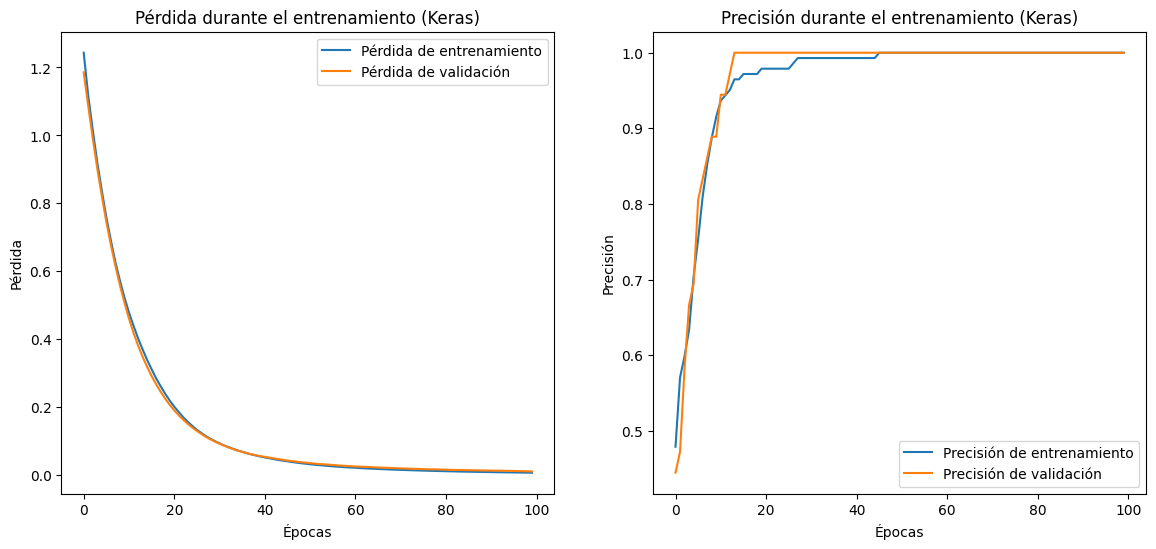

In [17]:
# **Gráficos**
plt.figure(figsize=(14, 6))

# Gráfico de la pérdida (Keras)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento (Keras)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la precisión (Keras)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento (Keras)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

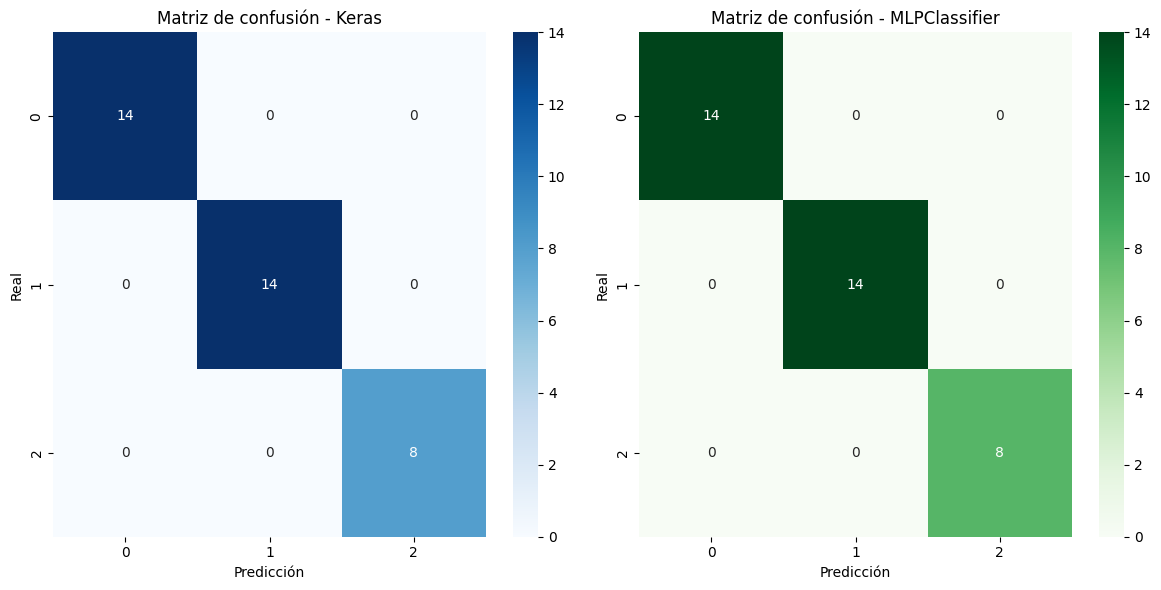

In [18]:
# **Matriz de Confusión (Keras y MLPClassifier)**
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión para Keras
sns.heatmap(cm_keras, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Matriz de confusión - Keras')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

# Matriz de confusión para MLPClassifier
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title('Matriz de confusión - MLPClassifier')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

In [19]:
# **Análisis de las métricas**
print("\n**Reporte de clasificación - Keras**")
print(classification_report(y_test, y_pred_keras))

print("\n**Reporte de clasificación - MLPClassifier**")
print(classification_report(y_test, y_pred_mlp))


**Reporte de clasificación - Keras**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


**Reporte de clasificación - MLPClassifier**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

